# Atividade 1

Predição de salário a partir dos anos de experiência

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

## Preparing Data

In [205]:
# Reading csv into a pandas dataframe
file_path = '/content/drive/My Drive/Salary_dataset.csv'
df = pd.read_csv(file_path)
display(df.head(10))

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [206]:
# Separate features (X) and target (y)
X = df[['YearsExperience']] # Use double brackets to keep X as a DataFrame
y = df['Salary']

Dividing Data

In [207]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:")
print("X_train:",X_train.shape, " y_train:",y_train.shape)
print("\nTesting data shape:")
print("X_test:",X_test.shape, " y_test:",y_test.shape)

Training data shape:
X_train: (24, 1)  y_train: (24,)

Testing data shape:
X_test: (6, 1)  y_test: (6,)


Normalizing Data

In [208]:
scaler = StandardScaler()

In [209]:
X_train_scaled = scaler.fit_transform(X_train)
print(X_train)
print("\n", X_train_scaled )

    YearsExperience
28             10.4
24              8.8
12              4.1
0               1.2
4               2.3
16              5.2
5               3.0
13              4.2
11              4.1
22              8.0
1               1.4
2               1.6
25              9.1
3               2.1
21              7.2
26              9.6
18              6.0
29             10.6
20              6.9
7               3.3
10              4.0
14              4.6
19              6.1
6               3.1

 [[ 1.77445774]
 [ 1.21912622]
 [-0.41216011]
 [-1.41869849]
 [-1.03690807]
 [-0.03036969]
 [-0.79395053]
 [-0.37745189]
 [-0.41216011]
 [ 0.94146047]
 [-1.34928205]
 [-1.27986561]
 [ 1.32325088]
 [-1.10632451]
 [ 0.66379471]
 [ 1.49679198]
 [ 0.24729607]
 [ 1.84387418]
 [ 0.55967005]
 [-0.68982587]
 [-0.44686833]
 [-0.23861901]
 [ 0.28200429]
 [-0.75924231]]


In [210]:
X_test_scaled = scaler.fit_transform(X_test)
print(X_test)
print("\n", X_test_scaled)

    YearsExperience
27              9.7
15              5.0
23              8.3
17              5.4
8               3.3
9               3.8

 [[ 1.62737604]
 [-0.39429816]
 [ 1.02517522]
 [-0.22224078]
 [-1.12554202]
 [-0.9104703 ]]


## Linear Regression Model

In [211]:
reg = LinearRegression()

Training model in training database

In [212]:
reg.fit(X_train_scaled, y_train)

LinearRegression()

Making predictions

In [213]:
y_train_pred = reg.predict(X_train_scaled)
y_test_pred = reg.predict(X_test_scaled)

Visualize predictions

In [214]:
print(y_train_pred)

[122387.880839   107309.77632215  63017.8443039   35688.77986711
  46054.97672244  73384.04115923  52651.64744857  63960.2258362
  63017.8443039   99770.72406372  37573.54293172  39458.30599632
 110136.92091906  44170.21365784  92231.6718053  114848.82858057
  80923.09341766 124272.6439036   89404.52720839  55478.79204548
  62075.4627716   67729.75196542  81865.47494996  53594.02898087]


In [215]:
print(y_test_pred)

[118394.38647561  63502.82376142 102043.70822032  68174.44612007
  43648.42873714  49487.95668545]


Score of predictions

In [216]:
#treino
reg.score(X_train_scaled, y_train)

0.9645401573418148

In [217]:
#teste
reg.score(X_test_scaled, y_test)

0.7044941090191734

Testing Other Metrics

In [218]:
def print_metrics(y_test_in, y_test_pred_in):
  print("MEAN: ", mean_absolute_error(y_test_in, y_test_pred_in))
  print("MAPE: ", mean_absolute_percentage_error(y_test_in, y_test_pred_in))
  print("MSE: ", mean_squared_error(y_test_in, y_test_pred_in))
  print("RMSE: ", mean_squared_error(y_test_in, y_test_pred_in)**2)
  print("R²: ", r2_score(y_test_in, y_test_pred_in))

In [219]:
# dados de treino
print_metrics(y_train, y_train_pred)

MEAN:  4221.0467344497365
MAPE:  0.0676546494564259
MSE:  27102249.731261354
RMSE:  734531940495656.1
R²:  0.9645401573418148


In [220]:
# dados de teste
print_metrics(y_test, y_test_pred)

MEAN:  10896.337158535409
MAPE:  0.14278634704996387
MSE:  150943210.41798493
RMSE:  2.2783852771288076e+16
R²:  0.7044941090191734


### Retraining the model with unscaled data

In [221]:
# Initialize a new Linear Regression model
reg_unscaled = LinearRegression()

# Train the model with unscaled data
reg_unscaled.fit(X_train, y_train)

# Make predictions with the unscaled model
y_train_pred_unscaled = reg_unscaled.predict(X_train)
y_test_pred_unscaled = reg_unscaled.predict(X_test)

In [222]:
X_train_array = X_train.values
X_test_array = X_test.values

In [223]:
#treino
reg.score(X_train_array, y_train)

-29.415027773522468

In [224]:
#teste
reg.score(X_test_array, y_test)

-47.4755270387349

In [225]:
# Evaluate the model performance on unscaled data
print("Metrics for model trained on unscaled data:")
print_metrics(y_train, y_train_pred_unscaled)

print("\nMetrics for model trained on unscaled data:")
print_metrics(y_test, y_test_pred_unscaled)

Metrics for model trained on unscaled data:
MEAN:  4221.046734449735
MAPE:  0.06765464945642588
MSE:  27102249.73126133
RMSE:  734531940495654.9
R²:  0.9645401573418148

Metrics for model trained on unscaled data:
MEAN:  6286.453830757745
MAPE:  0.07744778459829141
MSE:  49830096.855908394
RMSE:  2483038552669211.5
R²:  0.9024461774180497


## Visualize Model Predictions

Scaled Data

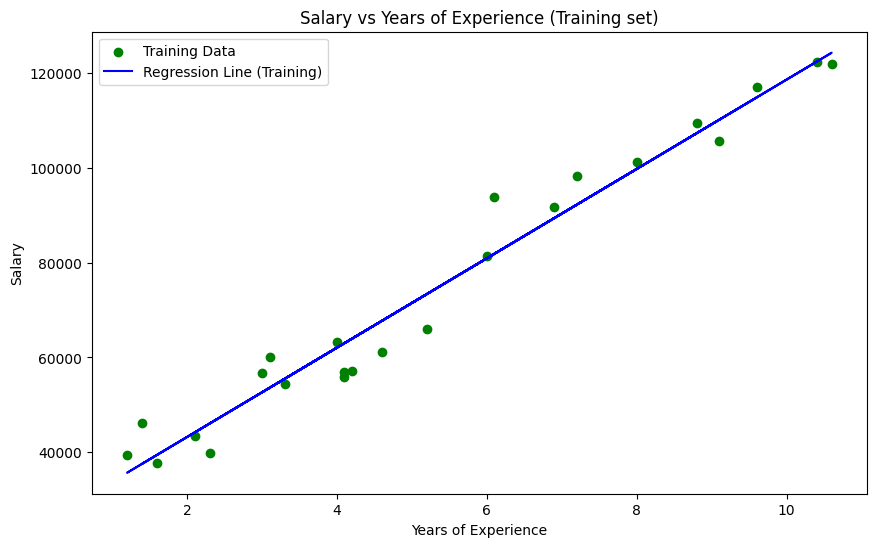

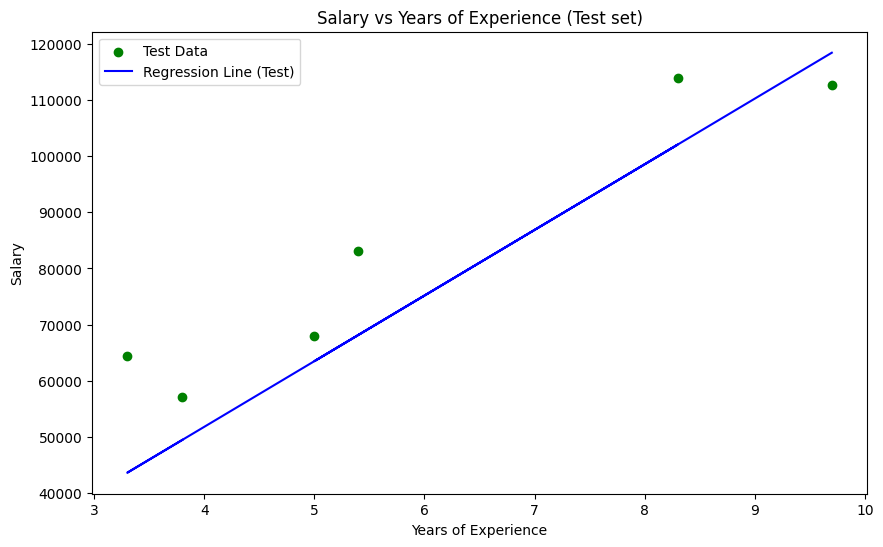

In [226]:
# Visualize the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.plot(X_train, reg.predict(X_train_scaled), color='blue', label='Regression Line (Training)')
plt.title('Salary vs Years of Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Visualize the test set results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_test, reg.predict(X_test_scaled), color='blue', label='Regression Line (Test)')
plt.title('Salary vs Years of Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

Unscaled Data

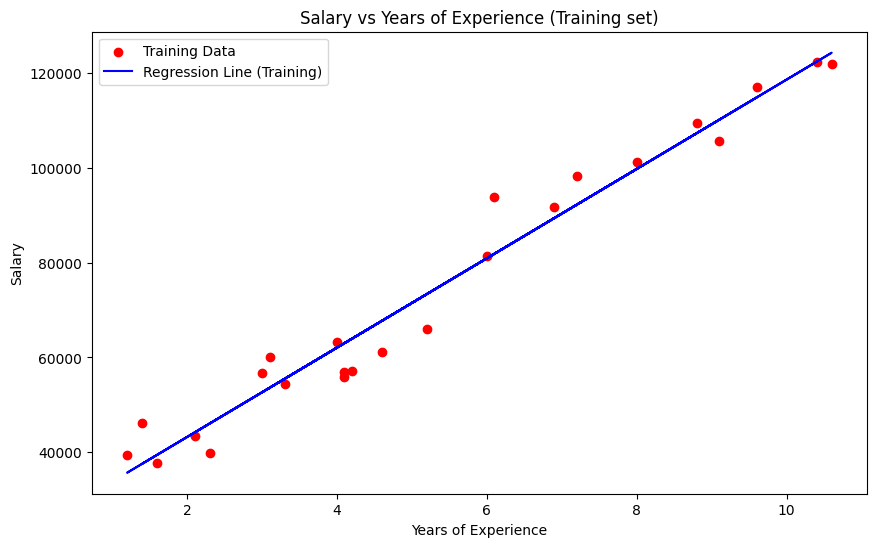

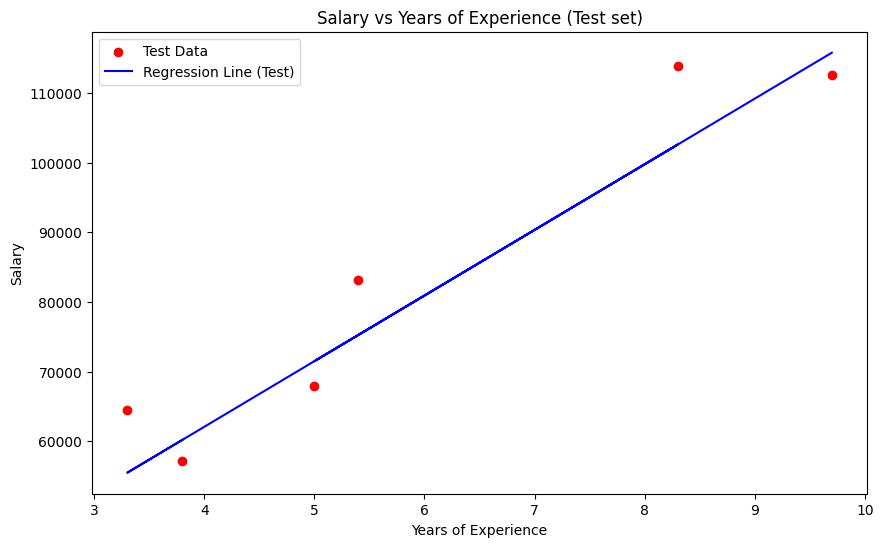

In [227]:
# Visualize the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_train, reg_unscaled.predict(X_train), color='blue', label='Regression Line (Training)')
plt.title('Salary vs Years of Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Visualize the test set results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, reg_unscaled.predict(X_test), color='blue', label='Regression Line (Test)')
plt.title('Salary vs Years of Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()